In [1]:
print("hola mundo")

hola mundo


In [2]:
import random
import csv
import pandas as pd

# Configuración de rangos y opciones
sabores = ["chocolate", "vanilla", "mixto"]
min_helados = 80
max_helados = 170
min_cantidad = 1
max_cantidad = 2
fecha_inicio = pd.to_datetime("2023-03-01")
fecha_fin = pd.to_datetime("2023-03-31")
hora_inicio = pd.to_datetime("08:00:00").time()
hora_fin = pd.to_datetime("18:00:00").time()

# Generar datos pseudoaleatorios
data = []
current_date = fecha_inicio
while current_date <= fecha_fin:
    current_time = pd.to_datetime(str(current_date.date()) + " " + str(hora_inicio))
    while current_time <= pd.to_datetime(str(current_date.date()) + " " + str(hora_fin)):
        sabor = random.choice(sabores)
        cantidad = random.randint(min_cantidad, max_cantidad)
        data.append({
            "sabor de helado vendido": sabor,
            "cantidad": cantidad,
            "dia": current_date.strftime("%d/%m/%Y"),
            "Hora": current_time.strftime("%H:%M")
        })
        current_time += pd.DateOffset(minutes=random.randint(1, 2))

    current_date += pd.DateOffset(days=1)

# Guardar datos en archivo CSV
with open("datos_helados.csv", "w", newline="") as csvfile:
    fieldnames = ["sabor de helado vendido", "cantidad", "dia", "Hora"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(data)

# Guardar datos en archivo XLSX
df = pd.DataFrame(data)
df.to_excel("datos_helados.xlsx", index=False)


Segundo intento

In [41]:
import pandas as pd

# Configurar pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Leer el archivo XLSX
datos = pd.read_excel('datos_10_3.xlsx')

# Obtener el resumen total de helados vendidos
total_helados = datos['cantidad'].sum()

# Obtener el resumen por día y sabor de helado
resumen = datos.groupby(['dia', 'sabor de helado vendido'])['cantidad'].sum().reset_index()

# Obtener el resumen general de los 31 días
resumen_general = resumen.groupby('sabor de helado vendido')['cantidad'].sum().reset_index()

# Imprimir el resumen total de helados vendidos
print("Resumen total de helados vendidos:")
print("Total de helados vendidos:", total_helados)
print()

# Imprimir el resumen por día y sabor de helado
print("Resumen por día y sabor de helado:")
print(resumen)
print()

# Imprimir el resumen general de los 31 días
print("Resumen general de los 31 días:")
print(resumen_general)


Resumen total de helados vendidos:
Total de helados vendidos: 2534

Resumen por día y sabor de helado:
           dia sabor de helado vendido  cantidad
0   01/03/2023               chocolate        33
1   01/03/2023                   mixto        24
2   01/03/2023                 vanilla        25
3   02/03/2023               chocolate        22
4   02/03/2023                   mixto        27
5   02/03/2023                 vanilla        30
6   03/03/2023               chocolate        31
7   03/03/2023                   mixto        22
8   03/03/2023                 vanilla        23
9   04/03/2023               chocolate        18
10  04/03/2023                   mixto        30
11  04/03/2023                 vanilla        28
12  05/03/2023               chocolate        18
13  05/03/2023                   mixto        31
14  05/03/2023                 vanilla        28
15  06/03/2023               chocolate        22
16  06/03/2023                   mixto        24
17  06/03/2023 

C:\Users\JAIRO\AppData\Local\Temp\ipykernel_18900\1870656614.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  resumen.pivot('dia', 'sabor de helado vendido', 'cantidad').plot(kind='bar', stacked=True)


<Figure size 1900x900 with 0 Axes>

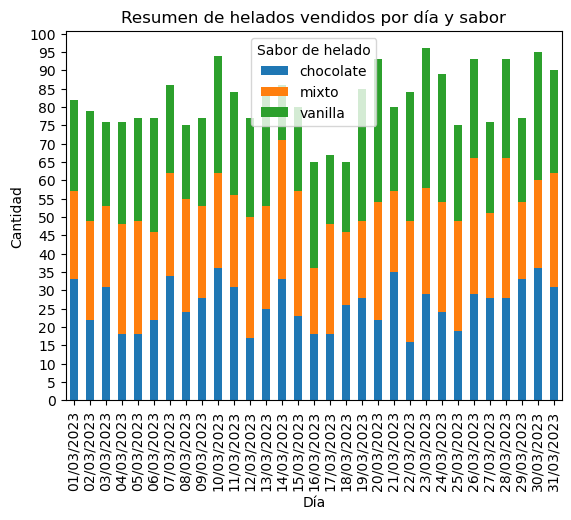

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo XLSX
datos = pd.read_excel('datos_10_3.xlsx')

# Obtener el resumen por día y sabor de helado
resumen = datos.groupby(['dia', 'sabor de helado vendido'])['cantidad'].sum().reset_index()

# Obtener el resumen general de los 31 días
resumen_general = resumen.groupby('sabor de helado vendido')['cantidad'].sum().reset_index()

# Gráfico de barras para el resumen por día y sabor de helado
plt.figure(figsize=(19, 9))
resumen.pivot('dia', 'sabor de helado vendido', 'cantidad').plot(kind='bar', stacked=True)
plt.title('Resumen de helados vendidos por día y sabor')
plt.xlabel('Día')
plt.ylabel('Cantidad')
plt.yticks(range(0, 101, 5))  # Configurar los ticks del eje y en incrementos de 5 hasta 100
plt.legend(title='Sabor de helado')

# Guardar la imagen en formato SVG
plt.savefig('resumen_ventas.png',  format='png')

plt.show()


C:\Users\JAIRO\AppData\Local\Temp\ipykernel_18900\2177476564.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  resumen.pivot('dia', 'sabor de helado vendido', 'cantidad').plot(kind='bar', stacked=True)


<Figure size 1000x600 with 0 Axes>

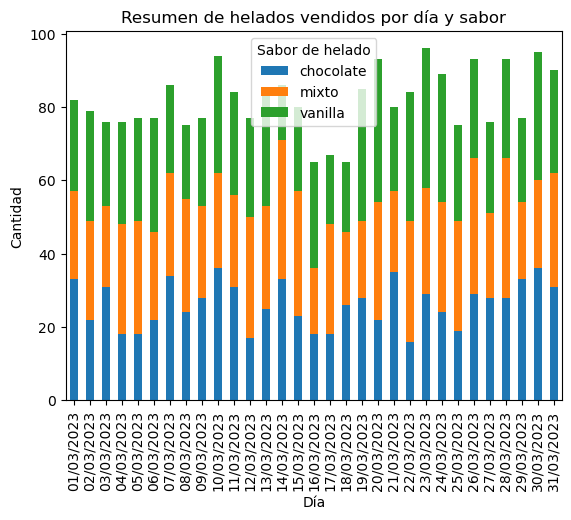

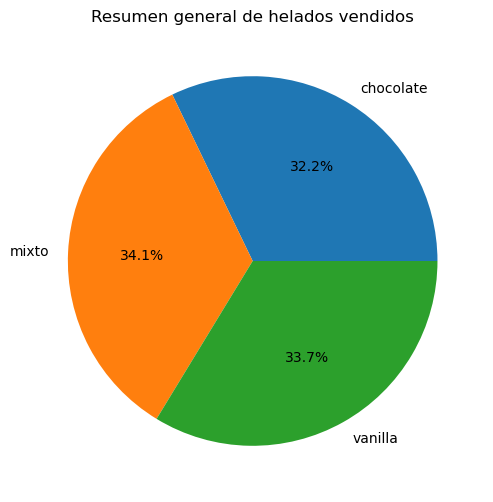

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo XLSX
datos = pd.read_excel('datos_10_3.xlsx')

# Obtener el resumen por día y sabor de helado
resumen = datos.groupby(['dia', 'sabor de helado vendido'])['cantidad'].sum().reset_index()

# Obtener el resumen general de los 31 días
resumen_general = resumen.groupby('sabor de helado vendido')['cantidad'].sum().reset_index()

# Gráfico de barras para el resumen por día y sabor de helado
plt.figure(figsize=(10, 6))
resumen.pivot('dia', 'sabor de helado vendido', 'cantidad').plot(kind='bar', stacked=True)
plt.title('Resumen de helados vendidos por día y sabor')
plt.xlabel('Día')
plt.ylabel('Cantidad')
plt.legend(title='Sabor de helado')
plt.show()

# Gráfico de pastel para el resumen general de los 31 días
plt.figure(figsize=(6, 6))
plt.pie(resumen_general['cantidad'], labels=resumen_general['sabor de helado vendido'], autopct='%1.1f%%')
plt.title('Resumen general de helados vendidos')
plt.show()


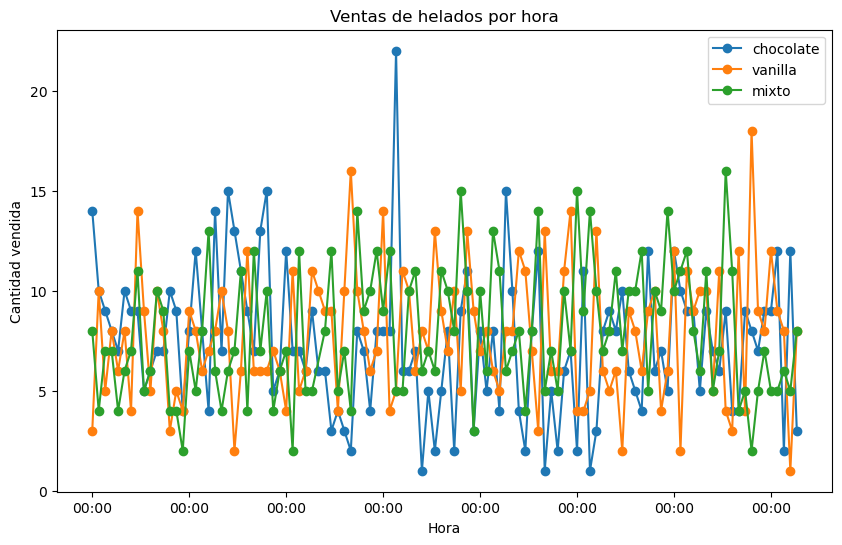

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo XLSX
datos = pd.read_excel('datos_10_3.xlsx')

# Obtener los datos para cada sabor de helado
sabores = ['chocolate', 'vanilla', 'mixto']

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))

# Generar el gráfico de línea para cada sabor de helado
for sabor in sabores:
    datos_sabor = datos[datos['sabor de helado vendido'] == sabor]
    ventas_por_hora = datos_sabor.groupby('Hora')['cantidad'].sum().reset_index()
    ax.plot(ventas_por_hora['Hora'], ventas_por_hora['cantidad'], marker='o', label=sabor)

# Configurar el título y las etiquetas de los ejes
ax.set_title('Ventas de helados por hora')
ax.set_xlabel('Hora')
ax.set_ylabel('Cantidad vendida')

# Configurar el formato de las horas en el eje x
ax.xaxis.set_major_locator(plt.MaxNLocator(8))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: pd.to_datetime(x).strftime("%H:%M")))

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()


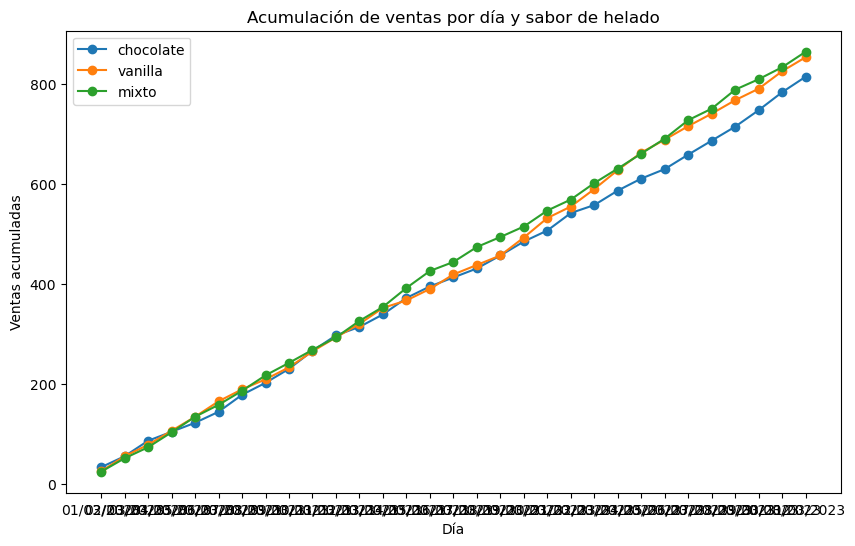

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo XLSX
datos = pd.read_excel('datos_10_3.xlsx')

# Obtener los datos para cada sabor de helado
sabores = ['chocolate', 'vanilla', 'mixto']

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))

# Crear una lista para almacenar los puntos de cada sabor
puntos_sabores = [[] for _ in range(len(sabores))]

# Calcular la acumulación de ventas por día para cada sabor de helado
for i, sabor in enumerate(sabores):
    datos_sabor = datos[datos['sabor de helado vendido'] == sabor]
    ventas_por_dia = datos_sabor.groupby('dia')['cantidad'].sum().reset_index()
    ventas_acumuladas = ventas_por_dia['cantidad'].cumsum()
    puntos_sabores[i] = list(zip(ventas_por_dia['dia'], ventas_acumuladas))

# Generar el gráfico de línea para cada sabor de helado
for i, sabor in enumerate(sabores):
    puntos_sabor = puntos_sabores[i]
    puntos_x, puntos_y = zip(*puntos_sabor)
    ax.plot(puntos_x, puntos_y, marker='o', label=sabor)

# Configurar el título y las etiquetas de los ejes
ax.set_title('Acumulación de ventas por día y sabor de helado')
ax.set_xlabel('Día')
ax.set_ylabel('Ventas acumuladas')

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()


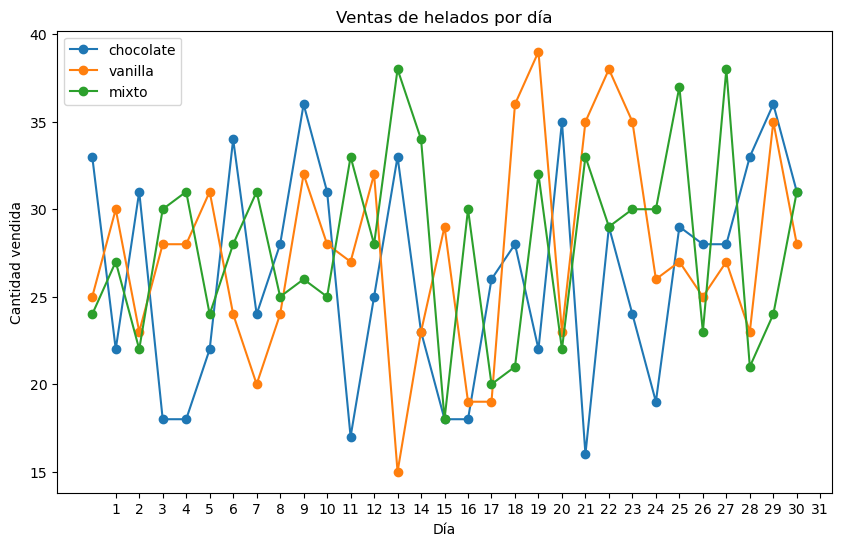

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo XLSX
datos = pd.read_excel('datos_10_3.xlsx')

# Obtener los datos para cada sabor de helado
sabores = ['chocolate', 'vanilla', 'mixto']

# Agrupar y sumar las ventas por día y sabor de helado
ventas_por_dia_sabor = datos.groupby(['dia', 'sabor de helado vendido'])['cantidad'].sum().unstack()

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))

# Generar el gráfico de línea para cada sabor de helado
for sabor in sabores:
    ax.plot(ventas_por_dia_sabor.index, ventas_por_dia_sabor[sabor], marker='o', label=sabor)

# Configurar el título y las etiquetas de los ejes
ax.set_title('Ventas de helados por día')
ax.set_xlabel('Día')
ax.set_ylabel('Cantidad vendida')

# Configurar el formato de los ticks del eje x
ax.set_xticks(range(1, 32))
ax.set_xticklabels(range(1, 32))

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()


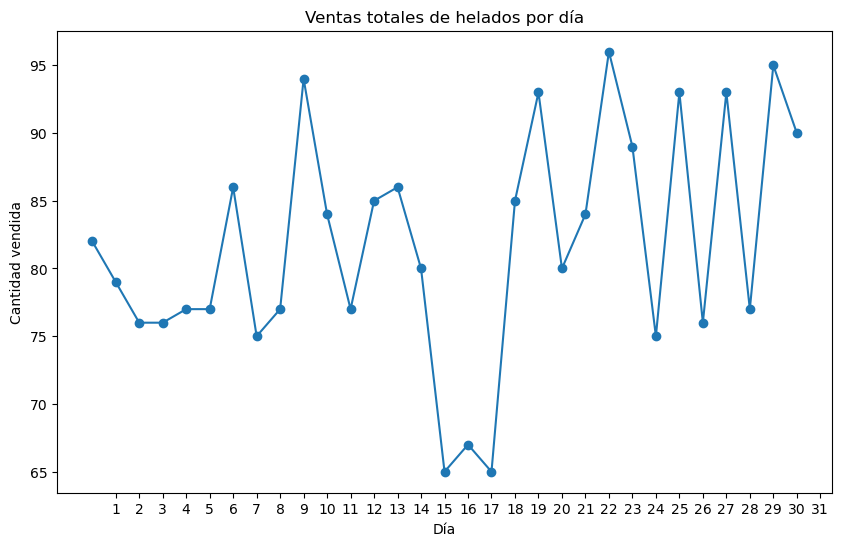

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo XLSX
datos = pd.read_excel('datos_10_3.xlsx')

# Agrupar y sumar las ventas por día
ventas_por_dia = datos.groupby('dia')['cantidad'].sum()

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))

# Generar el gráfico de línea de las ventas totales por día
ax.plot(ventas_por_dia.index, ventas_por_dia.values, marker='o')

# Configurar el título y las etiquetas de los ejes
ax.set_title('Ventas totales de helados por día')
ax.set_xlabel('Día')
ax.set_ylabel('Cantidad vendida')

# Configurar el formato de los ticks del eje x
ax.set_xticks(range(1, 32))
ax.set_xticklabels(range(1, 32))

# Mostrar el gráfico
plt.show()


In [14]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Leer el archivo XLSX
datos = pd.read_excel('datos.xlsx')

# Calcular la suma de las ventas por día
ventas_por_dia = datos.groupby('dia')['cantidad'].sum()

# Calcular el valor esperado
valor_esperado = ventas_por_dia.mean()

# Calcular el estadístico de prueba y el valor crítico
estadistico_prueba = np.sum((ventas_por_dia - valor_esperado) ** 2 / valor_esperado)
grados_libertad = len(ventas_por_dia) - 1
valor_critico = stats.chi2.ppf(0.95, grados_libertad)

# Imprimir los resultados
print("Ajuste de bondad - Distribución Normal:")
print("Estadístico de prueba:", estadistico_prueba)
print("Valor crítico:", valor_critico)
print("Grados de libertad:", grados_libertad)


Ajuste de bondad - Distribución Normal:
Estadístico de prueba: 37.791752154288055
Valor crítico: 43.77297182574219
Grados de libertad: 30


In [15]:
import pandas as pd
import scipy.stats as stats

# Leer el archivo XLSX
datos = pd.read_excel('datos.xlsx')

# Realizar la prueba de varianzas (ANOVA)
resultados_anova = stats.f_oneway(
    datos[datos['sabor de helado vendido'] == 'chocolate']['cantidad'],
    datos[datos['sabor de helado vendido'] == 'vanilla']['cantidad'],
    datos[datos['sabor de helado vendido'] == 'mixto']['cantidad']
)

# Imprimir los resultados
print("Prueba de varianzas (ANOVA):")
print("Estadístico de prueba:", resultados_anova.statistic)
print("Valor p:", resultados_anova.pvalue)


Prueba de varianzas (ANOVA):
Estadístico de prueba: 0.533692990529151
Valor p: 0.5864609295113621


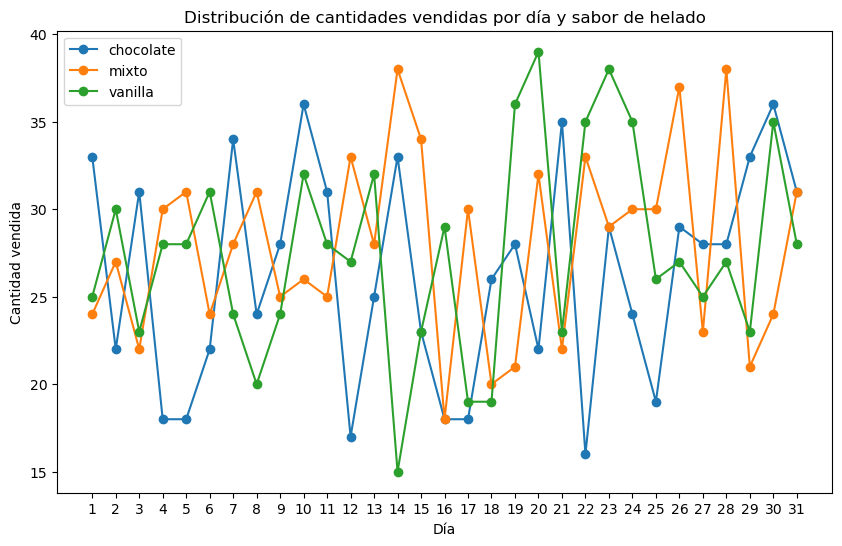

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo XLSX
datos = pd.read_excel('datos_10_3.xlsx')

# Agrupar y sumar las ventas por día, sabor de helado y cantidad vendida
ventas_por_dia_sabor = datos.groupby(['dia', 'sabor de helado vendido'])['cantidad'].sum().unstack()

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))

# Generar el gráfico de distribución binomial para cada sabor de helado
for sabor in ventas_por_dia_sabor.columns:
    cantidades = ventas_por_dia_sabor[sabor].dropna()
    dias = range(1, len(cantidades) + 1)
    ax.plot(dias, cantidades, marker='o', label=sabor)

# Configurar el título y las etiquetas de los ejes
ax.set_title('Distribución de cantidades vendidas por día y sabor de helado')
ax.set_xlabel('Día')
ax.set_ylabel('Cantidad vendida')

# Configurar los ticks del eje x
ax.set_xticks(range(1, len(dias) + 1))
ax.set_xticklabels(dias)

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()


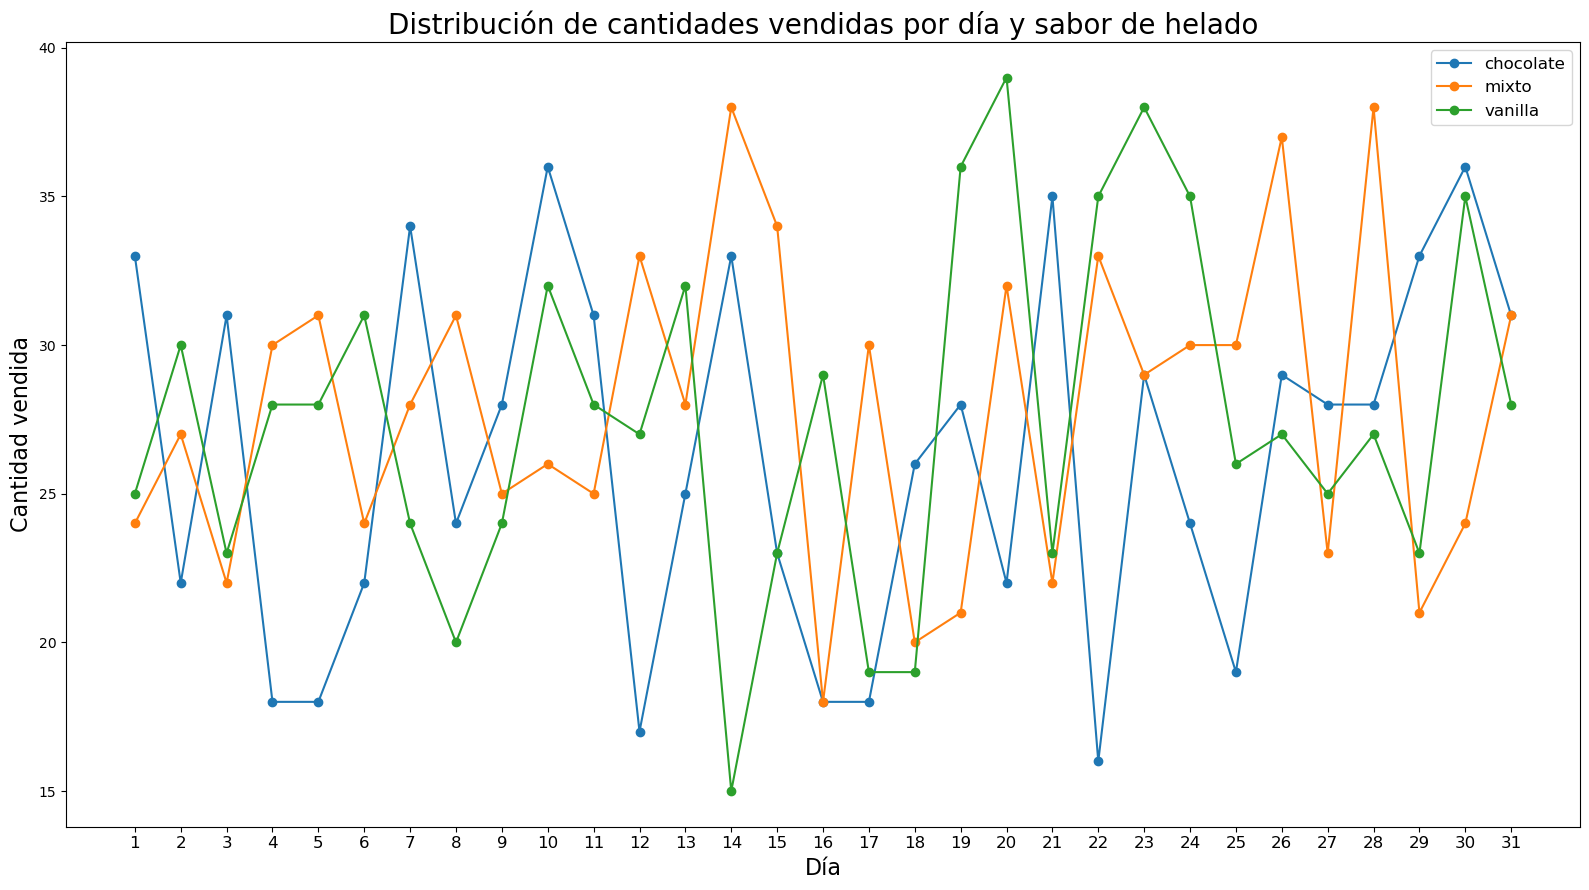

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo XLSX
datos = pd.read_excel('datos_10_3.xlsx')

# Agrupar y sumar las ventas por día, sabor de helado y cantidad vendida
ventas_por_dia_sabor = datos.groupby(['dia', 'sabor de helado vendido'])['cantidad'].sum().unstack()

# Crear una figura y un eje con una resolución de 1920x1080
fig, ax = plt.subplots(figsize=(16, 9), dpi=100)

# Generar el gráfico de distribución binomial para cada sabor de helado
for sabor in ventas_por_dia_sabor.columns:
    cantidades = ventas_por_dia_sabor[sabor].dropna()
    dias = range(1, len(cantidades) + 1)
    ax.plot(dias, cantidades, marker='o', label=sabor)

# Configurar el título y las etiquetas de los ejes
ax.set_title('Distribución de cantidades vendidas por día y sabor de helado', fontsize=20)
ax.set_xlabel('Día', fontsize=16)
ax.set_ylabel('Cantidad vendida', fontsize=16)

# Configurar los ticks del eje x
ax.set_xticks(range(1, len(dias) + 1))
ax.set_xticklabels(dias, fontsize=12)

# Mostrar la leyenda
ax.legend(fontsize=12)

# Mostrar el gráfico con una resolución de 1920x1080
plt.tight_layout()
plt.savefig('grafico.png', dpi=100)
plt.show()


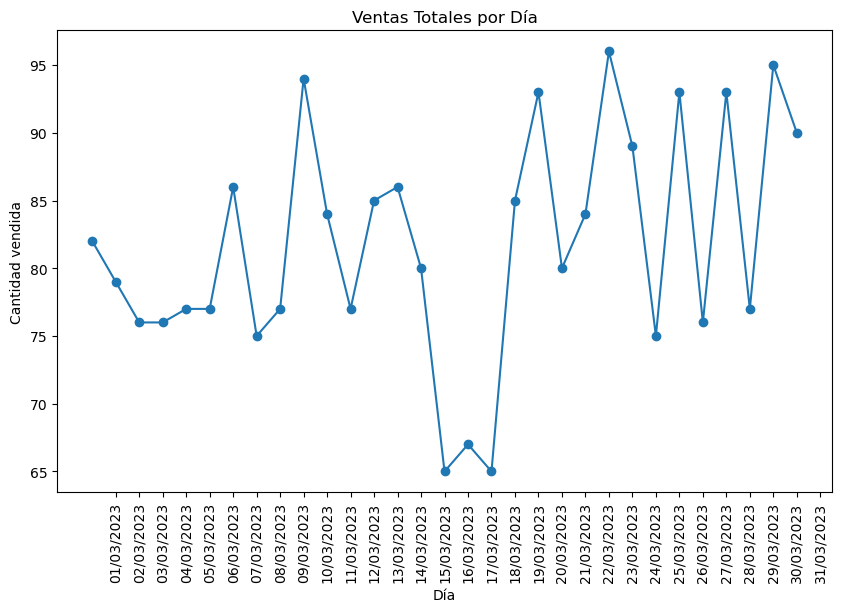

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo XLSX
datos = pd.read_excel('datos_10_3.xlsx')

# Agrupar y sumar las ventas por día
ventas_por_dia = datos.groupby('dia')['cantidad'].sum()

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))

# Generar el gráfico de línea para las ventas totales por día
ax.plot(ventas_por_dia.index, ventas_por_dia.values, marker='o')

# Configurar el título y las etiquetas de los ejes
ax.set_title('Ventas Totales por Día')
ax.set_xlabel('Día')
ax.set_ylabel('Cantidad vendida')

# Configurar el formato de los ticks del eje x
ax.set_xticks(range(1, len(ventas_por_dia.index) + 1))
ax.set_xticklabels(ventas_por_dia.index)

# Girar las etiquetas de las fechas en 90 grados
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


In [56]:
import pandas as pd

# Leer el archivo XLSX
datos = pd.read_excel('datos_10_3.xlsx')

# Obtener el resumen por día y sabor de helado
resumen = datos.groupby(['dia', 'sabor de helado vendido'])['cantidad'].sum().reset_index()

# Obtener el total de ventas por día
total_ventas_dia = resumen.groupby('dia')['cantidad'].sum()

# Calcular el porcentaje de ventas de cada sabor por día
resumen['porcentaje'] = resumen.apply(lambda row: (row['cantidad'] / total_ventas_dia[row['dia']]) * 100, axis=1)

# Obtener el porcentaje mínimo y máximo de cada sabor de helado
porcentaje_minimo = resumen.groupby('sabor de helado vendido')['porcentaje'].min()
porcentaje_maximo = resumen.groupby('sabor de helado vendido')['porcentaje'].max()

# Imprimir el porcentaje mínimo y máximo de cada sabor de helado
print("Porcentaje mínimo de ventas por sabor:")
print(porcentaje_minimo)
print()

print("Porcentaje máximo de ventas por sabor:")
print(porcentaje_maximo)


Porcentaje mínimo de ventas por sabor:
sabor de helado vendido
chocolate    19.047619
mixto        24.705882
vanilla      17.441860
Name: porcentaje, dtype: float64

Porcentaje máximo de ventas por sabor:
sabor de helado vendido
chocolate    43.750000
mixto        44.776119
vanilla      44.615385
Name: porcentaje, dtype: float64
